# Exercises - Evaluate

Do you work for this exercise in either a jupyter notebook named evaluate within your regression-exercises repository. By the end of this exercise you will also create a python script named evaluate, so the overall deliverables for this exercise are the python script and jupyter notebook both with the name evaluate within your regression-exercises repo.



## Load your zillow dataset.
Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.
> Here is some sample code to get you started: 

`from sklearn.linear_model import LinearRegression`  
`# assuming X and y are already defined`  
`model = LinearRegression().fit(X, y)`  
`predictions = model.predict(X) `  

> Modify and add to the code above as necessary for it to work with the zillow dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from scipy.stats import pearsonr, spearmanr, mannwhitneyu, f_oneway
from os.path import exists

import env
import explore
import wrangle
import evaluate

Number of observations removed: 239823


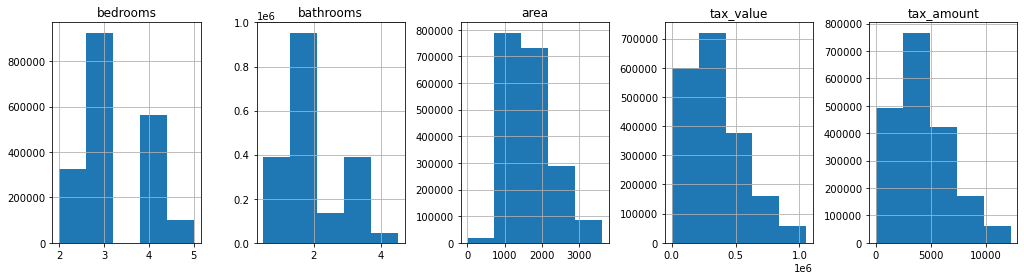

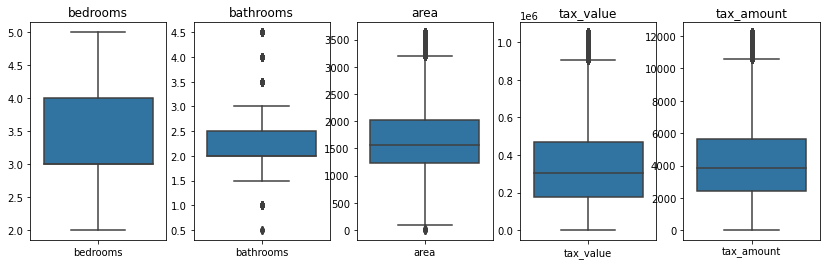

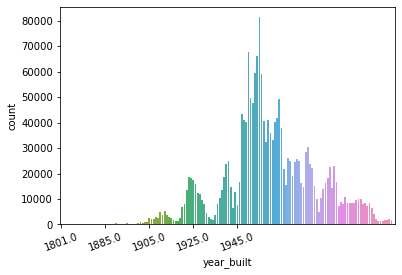

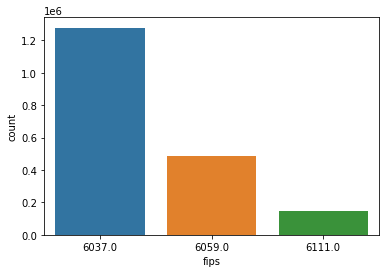

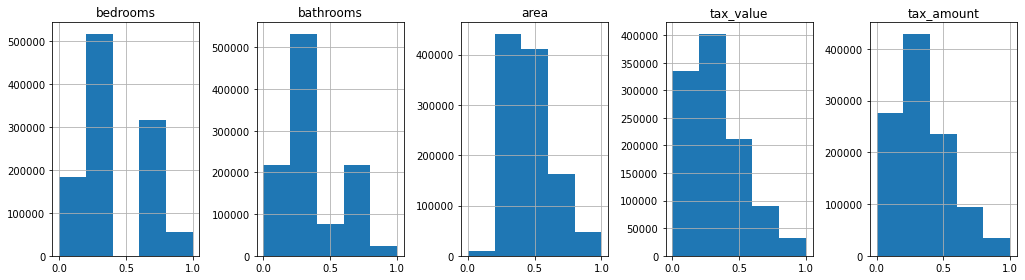

In [2]:
# import data and create scaled versions of subsets
train, validate, test = wrangle.prep_zillow(wrangle.acquire_zillow())
train_scaled, validate_scaled, test_scaled = wrangle.subset_scaler(train, validate, test)

In [3]:
#Establish Baseline
train['yhat_baseline'] = train.tax_value.mean()
train_scaled['yhat_baseline'] = round(train_scaled.tax_value.mean(),2)

In [4]:
#build model and fit
X_train = train.drop(columns='tax_value')
y_train = train.tax_value

model = LinearRegression().fit(X_train[['area']], y_train)

In [5]:
#predict

train['yhat'] = model.predict(train[['area']])

## Plot the residuals for the linear regression model that you made.


In [6]:
#calculate residuals
train['residual'] = train['yhat'] - train['tax_value']
train['residual_baseline'] = train['yhat_baseline'] - train['tax_value']

In [7]:
train.head(5)

,bedrooms,bathrooms,area,tax_value,year_built,tax_amount,fips,yhat_baseline,yhat,residual,residual_baseline
1888175,3.0,3.0,1713.0,939363.0,1911.0,11408.62,6037.0,342392.752721,347551.136023,-591811.863977,-596970.247279
431546,4.0,2.0,1303.0,268296.0,1960.0,3414.33,6037.0,342392.752721,279313.323157,11017.323157,74096.752721
525480,4.0,2.0,1554.0,72067.0,1963.0,1317.50,6059.0,342392.752721,321088.179326,249021.179326,270325.752721
562890,3.0,1.0,1585.0,463278.0,1951.0,5578.57,6037.0,342392.752721,326247.623714,-137030.376286,-120885.247279
1788646,4.0,3.0,2692.0,271961.0,1964.0,3374.90,6037.0,342392.752721,510489.718454,238528.718454,70431.752721


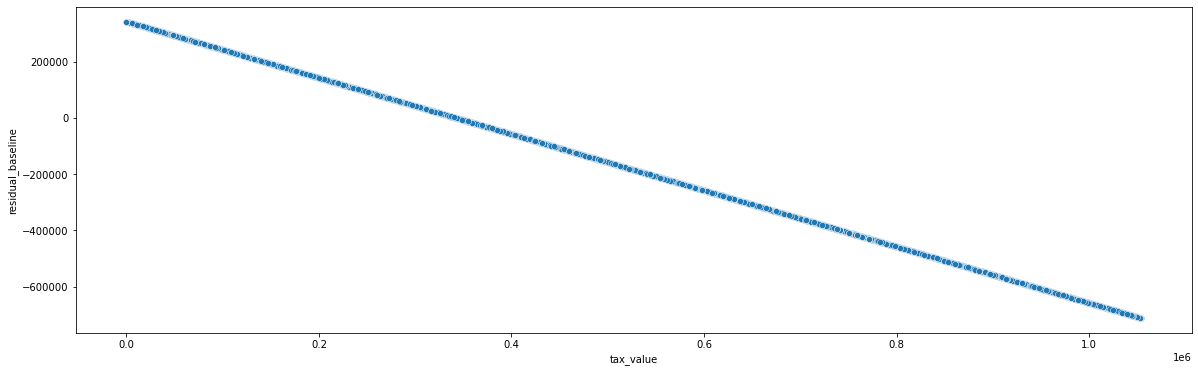

In [8]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=train, x='tax_value', y='residual_baseline');

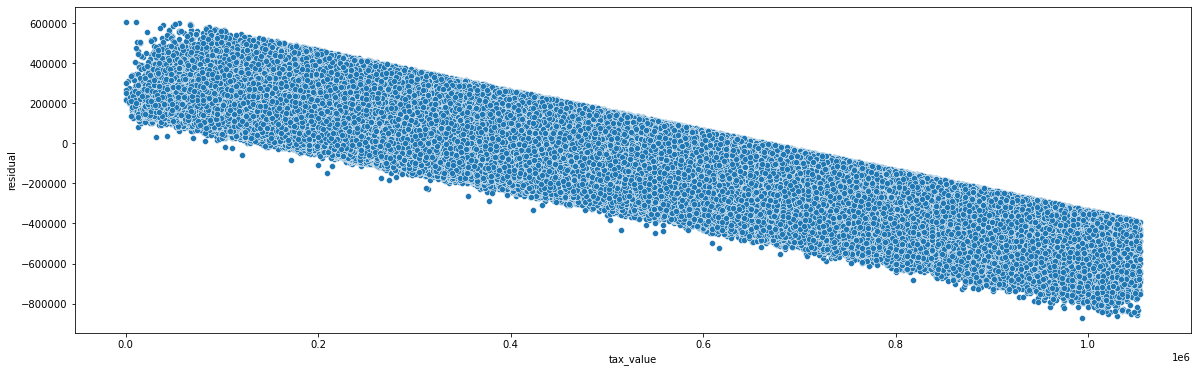

In [9]:
plt.figure(figsize=(20,6))
sns.scatterplot(data=train, x='tax_value', y='residual');

## Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.


In [10]:
#use sklearn
# first calculate 
SSE = mean_squared_error(train.tax_value, train.yhat) * len(train)
MSE = mean_squared_error(train.tax_value, train.yhat)
RMSE = mean_squared_error(train.tax_value, train.yhat, squared=False)

print(f'MSE = {MSE}')
print(f'SSE = {SSE}')
print(f'RMSE = {RMSE}')


MSE = 36949966229.12381
SSE = 3.958457272119279e+16
RMSE = 192223.74002480498


## Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [11]:
MSE_baseline = mean_squared_error(train.tax_value, train.yhat_baseline)
SSE_baseline = mean_squared_error(train.tax_value, train.yhat_baseline) * len(train)
RMSE_baseline = mean_squared_error(train.tax_value, train.yhat_baseline, squared=False)

print(f'MSE_baseline = {MSE_baseline}')
print(f'SSE_baseline = {SSE_baseline}')
print(f'RMSE_baseline = {RMSE_baseline}')

MSE_baseline = 46751449727.86492
SSE_baseline = 5.0084921596361144e+16
RMSE_baseline = 216220.83555445095


## Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.


In [12]:
if SSE < SSE_baseline:
    print('My model performs better than baseline')
else:
    print('My model performs worse than baseline. :( )')

My model performs better than baseline


## What is the amount of variance explained in your model?


In [13]:
r2_score(train.tax_value, train.yhat)

0.2096508997217087

## Is your model better than the baseline model?

In [14]:
RMSE_baseline - RMSE

23997.095529645972

> Yes, it is better

## Create a file named evaluate.py that contains the following functions.
* plot_residuals(y, yhat): creates a residual plot
* regression_errors(y, yhat): returns the following values:
* sum of squared errors (SSE)
* explained sum of squares (ESS)
* total sum of squares (TSS)
* mean squared error (MSE)
* root mean squared error (RMSE)
* baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
* better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [15]:
def plot_residuals(y, yhat):
    """ 
    """

    residuals = y - yhat

    plt.scatter(x=y, y=residuals)
    plt.xlabel('Tax Value')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Tax Value');
    
def regression_errors(y , yhat):
    """ 
    """

    MSE = mean_squared_error(y, yhat)
    SSE = MSE *len(y)
    RMSE = MSE **.5
    ESS = ((yhat - y.mean()) ** 2).sum()
    TSS= ESS + SSE

    return SSE, ESS, TSS, MSE, RMSE 

def baseline_mean_errors(y):
    """ 
    Purpose
        Computes the SSE, MSE, RMSE for a baseline model
    """
    baseline = np.repeat(y.mean(), len(y))

    MSE = mean_squared_error(y, baseline)
    SSE = MSE * len(y)
    RMSE = MSE **.5

    return SSE, MSE, RMSE
    
def better_than_baseline(y, yhat):
    SSE, ESS, TSS, MSE, RMSE = regression_errors(y, yhat)
    
    SSE_baseline, MSE_baseline, RMSE_baseline = baseline_mean_errors(y)
    
    if SSE < SSE_baseline:
        print('My model performs better than baseline')
    else:
        print('My  model performs worse than baseline. :( )')

In [16]:
better_than_baseline(train.tax_value, train.yhat)

My model performs better than baseline


In [17]:
evaluate.better_than_baseline(train.tax_value, train.yhat)

My model performs better than baseline
